In [1]:
import pandas as pd
import warnings 
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =10,8
%matplotlib inline

In [2]:
os.chdir('C:\\College\\Machine Learnings\\Part 3 - Classification\\Section 14 - Logistic Regression\\Logistic_Regression')

In [3]:
os.getcwd()

'C:\\College\\Machine Learnings\\Part 3 - Classification\\Section 14 - Logistic Regression\\Logistic_Regression'

In [4]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [5]:
dataset.head(n=1)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0


In [6]:
##### Missing values in Dataset
dataset[dataset['User ID'].isna()]
dataset[dataset['Gender'].isna()]
dataset[dataset['Age'].isna()]
dataset[dataset['EstimatedSalary'].isna()]
dataset[dataset['Purchased'].isna()]


,User ID,Gender,Age,EstimatedSalary,Purchased


In [7]:
from sklearn.preprocessing import LabelEncoder
##### ############# Create 2 D Arrays ###################################
X= dataset.iloc[:,2:4].values
Y = dataset.iloc[:,4:].values

In [8]:
### No categorical variables so this part is skipped
### Create train and test set
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

C:\Users\PuneetPC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
### Standard Scaler 
from sklearn.preprocessing import StandardScaler
sc_X =StandardScaler()
sc_Y =StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\PuneetPC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
#Y_train= sc_Y.fit_transform(Y_train)
#Y_test =sc_Y.transform(Y_test)
warnings.filterwarnings('ignore')

In [11]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train,Y_train)

GaussianNB(priors=None)

In [12]:
from sklearn.metrics import confusion_matrix
conf_mat_train = confusion_matrix(Y_train,bayes.predict(X_train))
conf_mat_train

array([[174,  15],
       [ 20,  91]], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
conf_test = confusion_matrix(Y_test,bayes.predict(X_test))
conf_test

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [14]:
Y_train.ravel()

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0], d

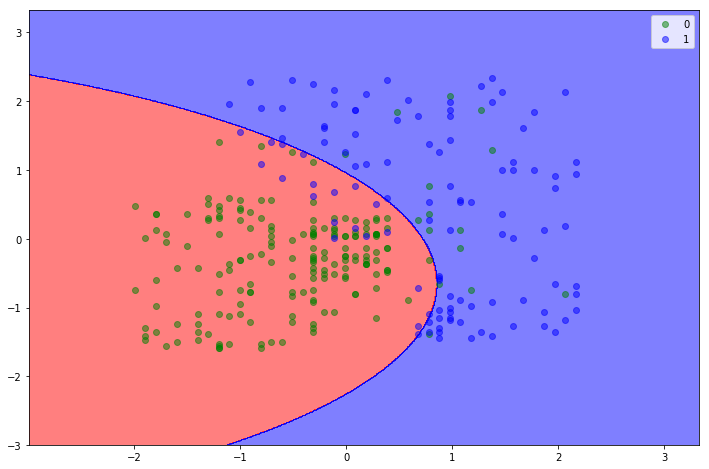

In [17]:
from matplotlib.colors import ListedColormap
X_set,Y_set = X_train, Y_train.ravel()
X1,X2 = np.meshgrid(np.arange(X_set.min()-1,X_set.max()+1,0.01),
                   np.arange(X_set.min()-1,X_set.max()+1,0.01))
plt.contourf(X1,X2,bayes.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             cmap=ListedColormap(('red','blue')),alpha=0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j ,1],
               c= ListedColormap(('green','blue'))(j),label=j,alpha=0.5)
plt.legend()
plt.rcParams['figure.figsize'] = 12,8
plt.show()

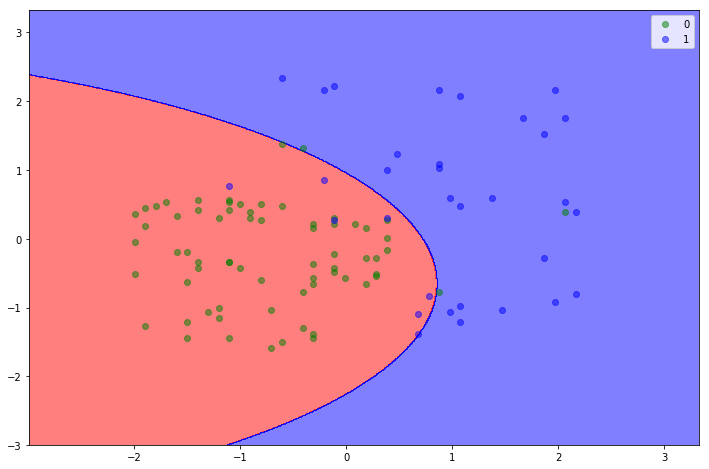

In [18]:
from matplotlib.colors import ListedColormap
X_set,Y_set = X_test, Y_test.ravel()
X1,X2 = np.meshgrid(np.arange(X_set.min()-1,X_set.max()+1,0.01),
                   np.arange(X_set.min()-1,X_set.max()+1,0.01))
plt.contourf(X1,X2,bayes.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             cmap=ListedColormap(('red','blue')),alpha=0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j ,1],
               c= ListedColormap(('green','blue'))(j),label=j,alpha=0.5)
plt.legend()
plt.rcParams['figure.figsize'] = 12,8
plt.show()